In [25]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt, argparse, numpy as np, math, sys, copy
from skimage.segmentation import slic, mark_boundaries, felzenszwalb
from skimage.util import img_as_float
from scipy.cluster import hierarchy
from skimage import io
from collections import defaultdict
import numpy as np
import SPHC as sphc
import superpixels as sp
import plot as pl
import process_ground_truth as pgt

In [2]:
imagePath = 'images/'
segmPath = 'images/segmentation/'
borderPath = 'images/borders/'
ultraPath = 'images/ultrametric/'
groundPath = 'BSDS500/data/groundTruth/train/'
trainPath = 'BSDS500/data/images/train/'
imageFiles = ['3063.jpg'] #, '71076.jpg', '100007.jpg', '101084.jpg', '385039.jpg']

In [4]:
for file in imageFiles:
    image = img_as_float(io.imread((imagePath + file)))
    sp.process_image(image, save=True, filename = file, paths=[segmPath, borderPath, ultraPath])
    
print('Done')

/home/falreis/miniconda2/envs/paa/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Done


/home/falreis/miniconda2/envs/paa/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: images/ultrametric/ult_3063_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


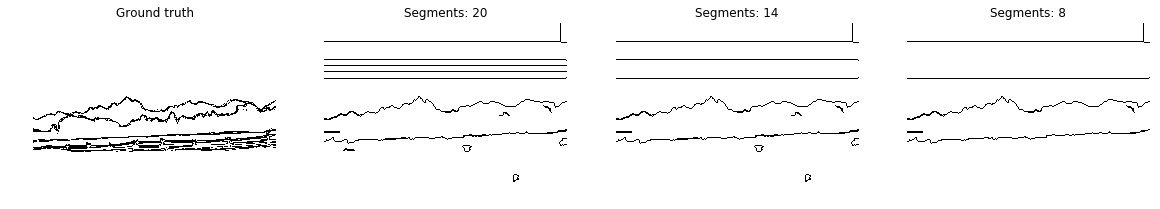

In [30]:
ground_base = pgt.get_groundTruth((groundPath + '2092.mat'))
ground_shape = (ground_base.shape[0], ground_base.shape[1], 3)

img = np.zeros(ground_shape,dtype=np.uint8) #create blank image to save
for i in range(3):
    img[:, :, i] = ground_base[:,:, 0]

image = img_as_float(io.imread((trainPath + '2092.jpg')))
_, fs_borders, ult = sp.process_image(image
                                      , slic_segments = 1024
                                      , felz_scale = 2048
                                      , felz_min_size = 30
                                      , save=False
                                      , filename = file
                                      , paths=[segmPath, borderPath, ultraPath])

#plot images
lult = int(len(ult) / 3)
segult = []
labels = []
segult.append(img)
labels.append('Ground truth')
for i in range(0,3):
    index = i*lult
    segult.append(ult[index])
    labels.append('Segments: ' + str(len(ult) - index))

pl.plot_compare_4(segult, labels, True)

In [31]:
import eval_boundary as ev

fs_ultrametric = ult[0][:, :, 0:1]
precision, recall = ev.eval_bound(fs_ultrametric, ground_base, 4)
print("Precision is: " + str(precision))
print("Recall is: " + str(recall))

Precision is: 0.385555253869
Recall is:0.400018497965
